# Intoduction


This is a smaller data set, for this to really do better it will need a larger one, but even this small demonstration shows the ability to predict with a higher accuracy than guessing what play is being run with few complex variables. Personally, I believe it is a success as I was consistently better than randomly guessing and any advantage snowball into a larger one later on.

# Setting Up CSV


In [ ]:
#Author: Ike Pawsat - ike.pawsat@gmail.com

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

!rm FD-2023.csv
!wget https://raw.githubusercontent.com/ikepawsat/Personal-Projects/main/Football%20Play%20Predictor/FD-2023.csv

stats = pd.read_csv("FD-2023.csv")

rm: cannot remove 'FD-2023.csv': No such file or directory
--2024-07-09 00:12:31--  https://raw.githubusercontent.com/ikepawsat/Personal-Projects/main/Football%20Play%20Predictor/FD-2023.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8337801 (8.0M) [text/plain]
Saving to: ‘FD-2023.csv’

FD-2023.csv         100%[===================>]   7.95M  --.-KB/s    in 0.1s    

2024-07-09 00:12:32 (62.5 MB/s) - ‘FD-2023.csv’ saved [8337801/8337801]



## Dataset Details

In [ ]:
stats.columns

Index(['GameId', 'GameDate', 'Quarter', 'Minute', 'Second', 'OffenseTeam',
       'DefenseTeam', 'Down', 'ToGo', 'YardLine', 'SeriesFirstDown',
       'NextScore', 'Description', 'TeamWin', 'SeasonYear', 'Yards',
       'Formation', 'PlayType', 'IsRush', 'IsPass', 'IsIncomplete',
       'IsTouchdown', 'PassType', 'IsSack', 'IsChallenge',
       'IsChallengeReversed', 'Challenger', 'IsMeasurement', 'IsInterception',
       'IsFumble', 'IsPenalty', 'IsTwoPointConversion',
       'IsTwoPointConversionSuccessful', 'RushDirection', 'YardLineFixed',
       'YardLineDirection', 'IsPenaltyAccepted', 'PenaltyTeam', 'IsNoPlay',
       'PenaltyType', 'PenaltyYards'],
      dtype='object')

PlayType
PASS                    14855
RUSH                    10046
KICK OFF                 2076
PUNT                     1751
TIMEOUT                  1495
SACK                     1161
SCRAMBLE                  900
EXTRA POINT               885
FIELD GOAL                824
NO PLAY                   682
QB KNEEL                  342
TWO-POINT CONVERSION      109
FUMBLES                    79
CLOCK STOP                 50
EXCEPTION                  10
Name: count, dtype: int64


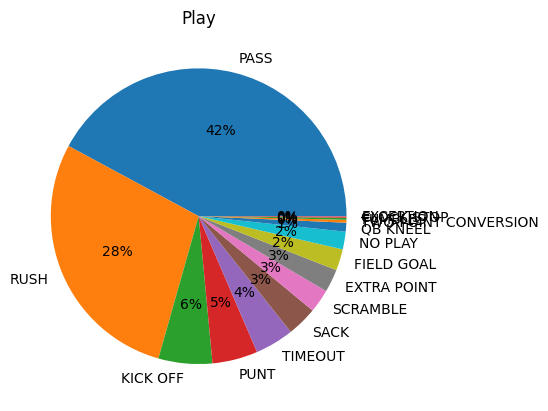

In [ ]:
play_type = stats["PlayType"].value_counts()
print(play_type)

plt.pie(play_type, labels = play_type.index, autopct = '%1.0f%%')
plt.title("Play")
plt.show()

In [ ]:
stats.head()

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
0,2023121101,2023-12-11,3,1,28,NYG,GB,0,0,85,...,0,0,NaN,15,OPP,0,NaN,0,NaN,0
1,2023121101,2023-12-11,3,1,35,NYG,GB,3,7,92,...,0,0,NaN,8,OPP,0,NaN,0,NaN,0
2,2023121101,2023-12-11,3,2,19,NYG,GB,2,11,88,...,0,0,RIGHT GUARD,12,OPP,0,NaN,0,NaN,0
3,2023121101,2023-12-11,3,2,56,NYG,GB,1,10,89,...,0,0,CENTER,11,OPP,0,NaN,0,NaN,0
4,2023121101,2023-12-11,3,3,43,NYG,GB,1,10,64,...,0,0,NaN,36,OPP,0,NaN,0,NaN,0


#Cleaning data

In [ ]:
#Checking for NaN values first so we know what we need to do
missing = stats.columns[stats.isnull().any()].tolist()
print(missing) #know some PlayTypes are missing so will solve down later


['Formation', 'PlayType', 'PassType', 'Challenger', 'RushDirection', 'PenaltyTeam', 'PenaltyType']


In [ ]:
#Honestly most confusing part, hope I made it clear

# Define the teams
team1 = "KC"  # AFC divisional 2022 game was best I've ever seen...
team2 = "BUF"

# Step 1: Filter for KC offense and BUF defense
cleaned_teams = stats[(stats["OffenseTeam"] == team1) & (stats["DefenseTeam"] == team2)]
print(f"Number of rows after filtering for teams: {cleaned_teams.shape[0]}")

# Step 2: Filter for relevant play types
play_types = ["PASS", "RUSH", "SCRAMBLE", "SACK"]
cleaned_type = cleaned_teams[cleaned_teams["PlayType"].isin(play_types)]
print(f"Number of rows after filtering for play types: {cleaned_type.shape[0]}")

# Step 3: Update 'SACK' to 'PASS' and 'SCRAMBLE' to 'RUSH'
cleaned_type.loc[cleaned_type["PlayType"] == "SACK", "PlayType"] = "PASS"
cleaned_type.loc[cleaned_type["PlayType"] == "SCRAMBLE", "PlayType"] = "RUSH"

# Step 4: Change passes to 1 and rushes to 0
cleaned_type.loc[cleaned_type["PlayType"] == "PASS", "PlayType"] = 1
cleaned_type.loc[cleaned_type["PlayType"] == "RUSH", "PlayType"] = 0

# Step 5: Change formation to 2, 1, 0
cleaned_type.loc[cleaned_type["Formation"] == "SHOTGUN", "Formation"] = 2
cleaned_type.loc[cleaned_type["Formation"] == "UNDER CENTER", "Formation"] = 1
cleaned_type.loc[cleaned_type["Formation"] == "NO HUDDLE SHOTGUN", "Formation"] = 0

# Step 6: Change field side to 1, 0
cleaned_type.loc[cleaned_type["YardLineDirection"] == "OPP", "YardLineDirection"] = 1
cleaned_type.loc[cleaned_type["YardLineDirection"] == "OWN", "YardLineDirection"] = 0

# Step 7: Remove rows where PlayType is not a pass (1) or a rush (0)
cleaned = cleaned_type[cleaned_type["PlayType"].isin([1, 0])]
print(f"Number of rows after final filtering: {cleaned.shape[0]}")

# Step 8: Drop all NaN values incased I missed any
cleaned.dropna(subset=["PlayType"], inplace=True)

"""
missing = stats.columns[stats.isnull().any()].tolist()
print(missing)

for col in missing:
    print(f"Column: {col}")
    print(cleaned[cleaned[col].isnull()])
    print()
"""

# Display the cleaned data
print()
cleaned.head()




Number of rows after filtering for teams: 95
Number of rows after filtering for play types: 66
Number of rows after final filtering: 66



,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,...,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
73,2023121009,2023-12-10,4,1,25,KC,BUF,2,10,51,...,0,0,NaN,49,1,1,KC,1,OFFENSIVE OFFSIDE,5
74,2023121009,2023-12-10,4,1,28,KC,BUF,1,10,51,...,0,0,NaN,49,1,0,NaN,0,NaN,0
102,2023121009,2023-12-10,4,11,35,KC,BUF,3,8,90,...,0,0,NaN,10,1,0,NaN,0,NaN,0
103,2023121009,2023-12-10,4,11,38,KC,BUF,2,8,90,...,0,0,NaN,10,1,0,NaN,0,NaN,0
104,2023121009,2023-12-10,4,12,18,KC,BUF,1,10,88,...,0,0,RIGHT GUARD,12,1,0,NaN,0,NaN,0


## Dividing our test/train sets


In [ ]:
#We need to remove identifying game data from each like GameID, Data, TeamWin, SeasonYear etc
#We also want to remove things that could help the ML Program identify if it was a pass, i.e an IsIncomplete value of 1 means the play was a pass so we need to remove it
#Divide data into test/train sets
#I ultimately decided not to remove them, but rather just create a "params" list with acceptable variables, minus few I chose to ignore

params = cleaned[["Quarter", 'Minute', 'Down', 'ToGo', 'YardLine', 'SeriesFirstDown',
       'Formation', 'YardLineDirection']]

x = params
x = x.astype(int) #convert from object to ints
y = cleaned["PlayType"]
y = y.astype(int)

#Split data into test/train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_test)
print()
print("Testing size:", y_test.shape) #small to be honest



       Quarter  Minute  Down  ToGo  YardLine  SeriesFirstDown  Formation  \
38736        3       1     3     2        34                1          2   
38761        4       1     2     3        32                1          2   
73           4       1     2    10        51                0          2   
38343        2      10     2     8        32                0          2   
105          4      12     1    10        68                1          1   
38762        4       1     2    15        46                0          2   
342          2       1     2    10        87                0          2   
121          3       5     3     1        60                1          1   
38764        4       1     4    15        46                0          2   
389          1      12     1    10        51                0          2   
38322        1      13     1    10        37                0          2   
117          3       4     2     9        90                0          2   
38333       

## Visualization Graphs


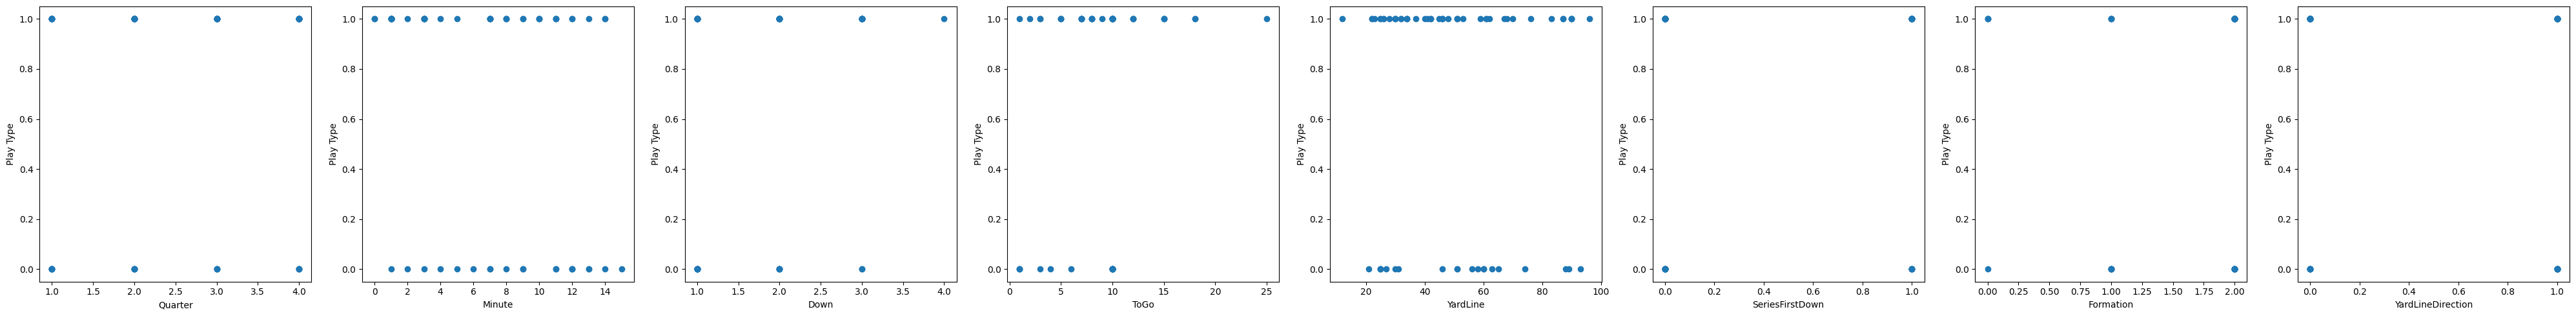

In [ ]:
import matplotlib.pyplot as plt

length = len(params.columns)

fig, axs = plt.subplots(1, length, figsize=(5 * length, 5))

for i, param in enumerate(params.columns):
    axs[i].scatter(params[param], y)
    axs[i].set_xlabel(param)
    axs[i].set_ylabel("Play Type")

plt.tight_layout()
plt.show()


#Machine Learning Program


## Baseline

PlayType
1    34
0    18
Name: count, dtype: int64


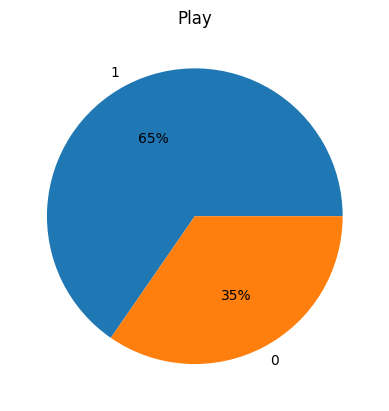

In [ ]:
#We need to set a baseline, I looked at the full data set and if the average was 30% runs 70% pass, that is was the baseline would use those values
train_type = y_train.value_counts()
print(train_type)

plt.pie(train_type, labels = train_type.index, autopct = '%1.0f%%') #1 is pass, 0 is run
plt.title("Play")
plt.show()

In [ ]:
#Looking above we get 65% 35% for this example, so we will use these values for our Majority Class Baseline
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

k = 10

print("Majority class Baseline")
majority_clf = DummyClassifier(strategy='most_frequent')
scores = cross_val_score(majority_clf, X_train, y_train, cv=k)
print(f"Mean Accuracy: {np.mean(scores):.4f}")

#for me to consider this project a success I want to be 10% better

Majority class Baseline
Mean Accuracy: 0.6533


## ML Trials

### Random Forest Classifier

In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

print("Random Forest classifier")
model1 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
scores = cross_val_score(model1, X_train, y_train, cv=k)
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print()

Random Forest classifier
Mean Accuracy: 0.6967



### Multi-layer Perceptron

In [ ]:
#MLP Neural Network Classifier
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000000)

model2.fit(X_train, y_train)
scores = cross_val_score(model2, X_train, y_train, cv=k)
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print()

Mean Accuracy: 0.6733



### Gaussian Naive Bayes


In [ ]:
#Gaussian NB Classifier
from sklearn.naive_bayes import GaussianNB

print("GaussianNB")
model3 = GaussianNB()
scores = cross_val_score(model3, X_train, y_train, cv=k)
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print()


GaussianNB
Mean Accuracy: 0.6433



#Review


## Save the Best Preforming Model's Predictions


In [ ]:
import csv
from google.colab import files

best_model = model1

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

with open("predictions.csv", 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Prediction'])
    for pred in y_pred:
        writer.writerow([pred])

files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Statement about Program

This is just a short discussion about the program.

Obviously the biggest issue is the data set size; however, despite this, I do believe that my model1 was 5% better and would be much better over larger data. To get larger data I could have only looked at team1 versus when they are playing eachother. Despite this, I am happy with the work.